This is a Data Engineering project that aims to create new features from a dataset in order provide good and reliable metrics that can help the manager of a business to take better decisions based on customers behavior. 

In this project we used an Online Retail Dataset available on UCI by this link: https://archive-beta.ics.uci.edu/dataset/352/online+retail

The features on this dataset are: InvoiceNo, StockCode, Description, InvoiceDate, UnitPrice, CustomerID, Country.

In [35]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys



In [36]:
dataset = pd.read_excel('Online Retail.xlsx')

In [37]:
dataset.info()
dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Here we are applying a simple business rule with the data we have. 
So the revenue will be defined as Revenue = Quantity x UnitPrice 

In [38]:
dataset['Revenue'] = dataset.Quantity * dataset.UnitPrice
dataset


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


This function will format the date so we can group data by month and plot a clean graph 

In [39]:
def CustomDateFormat (dataset: pd.DataFrame) -> pd.DataFrame:
    aux_dataframe = pd.DataFrame([])
    new_dataframe = pd.DataFrame([])
    for i in dataset['InvoiceDate'].dt.year.unique():

        aux_dataframe = dataset.loc[dataset.InvoiceDate.dt.year == i]

        aux_dataframe['Date'] = [f'{i}-0{x}' if x <=9 else f'{i}-{x}' for x in aux_dataframe.InvoiceDate.dt.month]

        new_dataframe = pd.concat([new_dataframe, aux_dataframe])
    return new_dataframe

sys.modules[__name__] = CustomDateFormat

In [40]:
grouped_df = CustomDateFormat(dataset)
grouped_df = grouped_df.groupby('Date').sum().reset_index()
grouped_df.drop(columns='CustomerID', inplace=True)
grouped_df

,Date,Quantity,UnitPrice,Revenue
0,2010-12,342228,260520.850,748957.020
1,2011-01,308966,172752.800,560000.260
2,2011-02,277989,127448.770,498062.650
3,2011-03,351872,171486.510,683267.080
4,2011-04,289098,129164.961,493207.121
5,2011-05,380391,190685.460,723333.510
6,2011-06,341623,200717.340,691123.120
7,2011-07,391116,171906.791,681300.111
8,2011-08,406199,150385.680,682680.510
9,2011-09,549817,199235.212,1019687.622


In [41]:
Revenue_Date_df = grouped_df[['Date', 'Revenue']]
Revenue_Date_df.head()

,Date,Revenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121


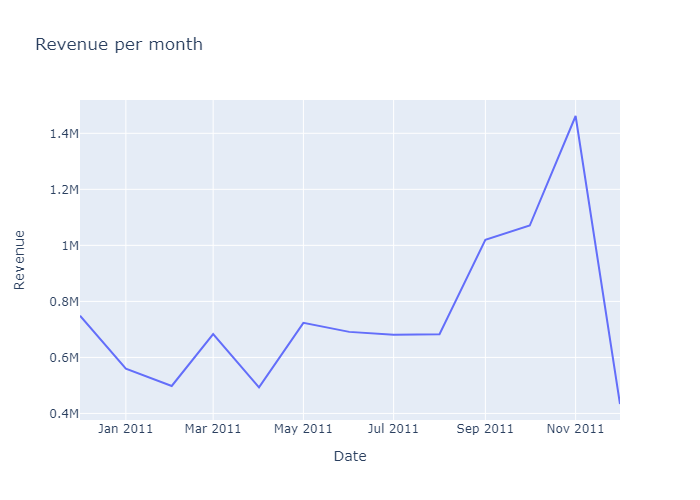

In [42]:

import plotly.express as px





fig = px.line(
    Revenue_Date_df, x=Revenue_Date_df.Date, y=Revenue_Date_df.Revenue, title="Revenue per month"
    
)

fig.show('png')

Note that we have a decrease in december values. That's because we have incomplete data of this month

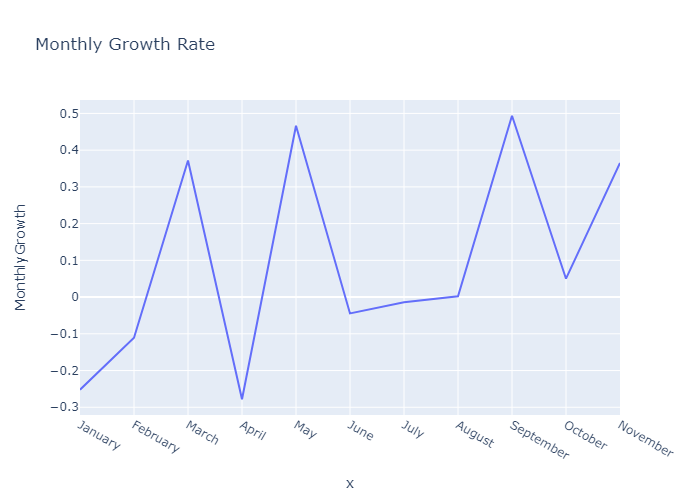

In [43]:
#using pct_change() function to see monthly percentage change
Revenue_Date_df['MonthlyGrowth'] = Revenue_Date_df['Revenue'].pct_change()
CopyDF = Revenue_Date_df.copy()
CopyDF['Date'] = pd.to_datetime(CopyDF['Date'], format="%Y-%m")
CopyDF.head()
CopyDF= CopyDF.loc[(CopyDF.Date.dt.month != 12) & (CopyDF.Date.dt.year == 2011)]


fig = px.line(data_frame=CopyDF, x=CopyDF['Date'].dt.month_name(),y=CopyDF['MonthlyGrowth'], title="Monthly Growth Rate" )
fig.show('png')

Now we'll analyse only the UK data

In [44]:
df_uk = dataset[dataset.Country=='United Kingdom']
df_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [45]:
formated_uk_df = CustomDateFormat(df_uk)


now we are going to see the quantity of customers that consumed our product per month

In [46]:
monthly_active = formated_uk_df.groupby('Date')['CustomerID'].nunique().reset_index()
monthly_active


,Date,CustomerID
0,2010-12,871
1,2011-01,684
2,2011-02,714
3,2011-03,923
4,2011-04,817
5,2011-05,985
6,2011-06,943
7,2011-07,899
8,2011-08,867
9,2011-09,1177


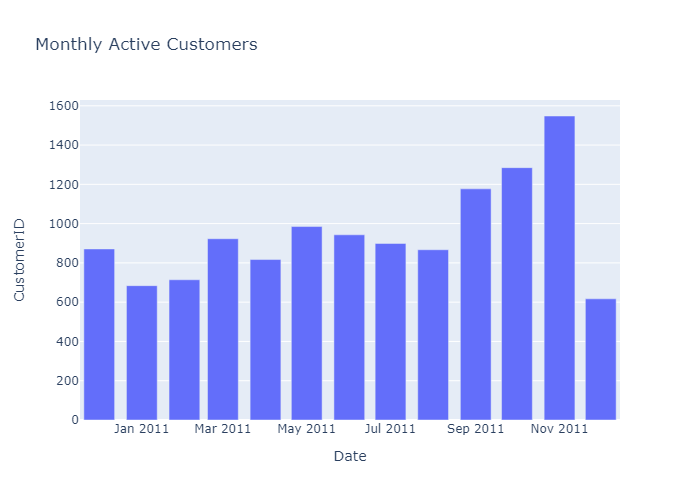

In [47]:

fig = px.bar(data_frame=monthly_active, x=monthly_active['Date'], y=monthly_active['CustomerID'], title='Monthly Active Customers')
fig.show('png')

Now we're going to see the monthly quantity of itens that were sold

In [53]:
monthly_quantity = formated_uk_df.groupby('Date')['Quantity'].sum().reset_index()
monthly_quantity

,Date,Quantity
0,2010-12,298101
1,2011-01,237381
2,2011-02,225641
3,2011-03,279843
4,2011-04,257666
5,2011-05,306452
6,2011-06,258522
7,2011-07,324129
8,2011-08,319804
9,2011-09,458490


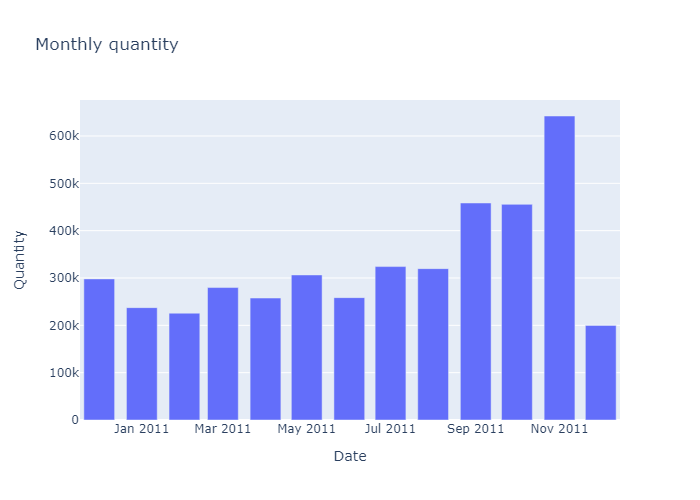

In [56]:


fig = px.bar(data_frame=monthly_quantity, x=monthly_quantity.Date, y=monthly_quantity.Quantity, title="Monthly quantity")

fig.show('png')

Now we're going to see the mean revenue per transaction

In [50]:
monthly_revenue = formated_uk_df.groupby('Date')['Revenue'].mean().reset_index()
monthly_revenue

,Date,Revenue
0,2010-12,16.865860
1,2011-01,13.614680
2,2011-02,16.093027
3,2011-03,16.716166
4,2011-04,15.773380
5,2011-05,17.713823
6,2011-06,16.714748
7,2011-07,15.723497
8,2011-08,17.315899
9,2011-09,18.931723


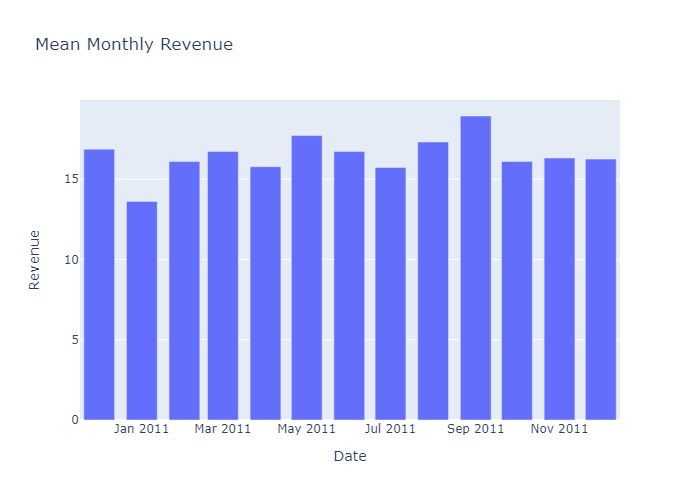

In [51]:
plot_data = go.Bar(
    x = monthly_revenue.Date,
    y = monthly_revenue.Revenue
)

plot_layout = go.Layout(
    xaxis= {'type': 'category'},
    title='mean monthly revenue'
)

fig = px.bar(data_frame=monthly_revenue, x = monthly_revenue.Date, y = monthly_revenue.Revenue, title='Mean Monthly Revenue')
fig.show('png')